1. Loading and Preprocessing the Data 
a. Import necessary libraries and load the Iris dataset


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


b. Drop the species column
Since clustering doesn't use the target variable (species), we don't need to include it for clustering tasks:

In [3]:
# Since the dataset doesn't have a separate column for species (target), 
# we directly use the data part for clustering algorithms.
X = df.values


2. Clustering Algorithm Implementation 
A) KMeans Clustering 
a. Brief Description of KMeans Clustering
KMeans clustering is an iterative algorithm that partitions data into k clusters. Each point is assigned to the nearest cluster center (centroid), and the centroid is updated based on the points assigned to it. This process repeats until convergence (when centroids no longer change significantly).

b. Why KMeans Might be Suitable for the Iris Dataset
The Iris dataset has multiple distinct classes, and KMeans can effectively separate them into clusters based on features like sepal length and width. Since the number of clusters is known (3 species of Iris), KMeans is a suitable method to partition the dataset.

c. Apply KMeans Clustering

C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


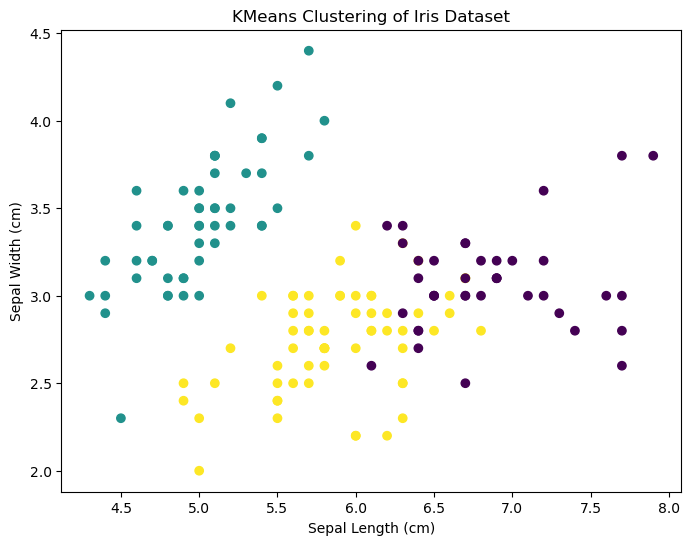

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying KMeans with 3 clusters (since there are 3 species in the Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assigning cluster labels to the data
df['Cluster'] = kmeans.labels_

# Visualizing the clusters (using two features: sepal length and sepal width)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


B) Hierarchical Clustering 
a. Brief Description of Hierarchical Clustering
Hierarchical clustering builds a tree of clusters by either merging small clusters (agglomerative) or splitting large clusters (divisive). In agglomerative hierarchical clustering, each data point starts as its own cluster, and pairs of clusters are merged iteratively based on the distance between them. The process continues until all points are in a single cluster.

b. Why Hierarchical Clustering Might be Suitable for the Iris Dataset
Hierarchical clustering is a good choice for the Iris dataset as it doesn't require the number of clusters to be specified in advance. It provides a dendrogram, allowing for flexibility in selecting the number of clusters, which is helpful for exploring the dataset.

c. Apply Hierarchical Clustering

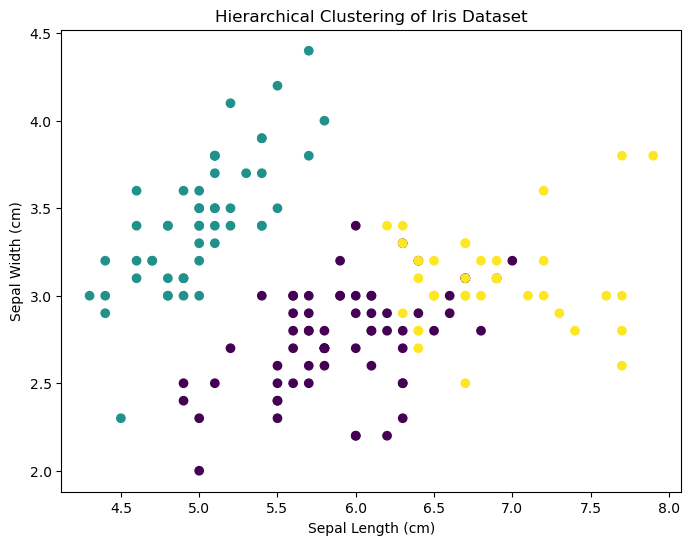

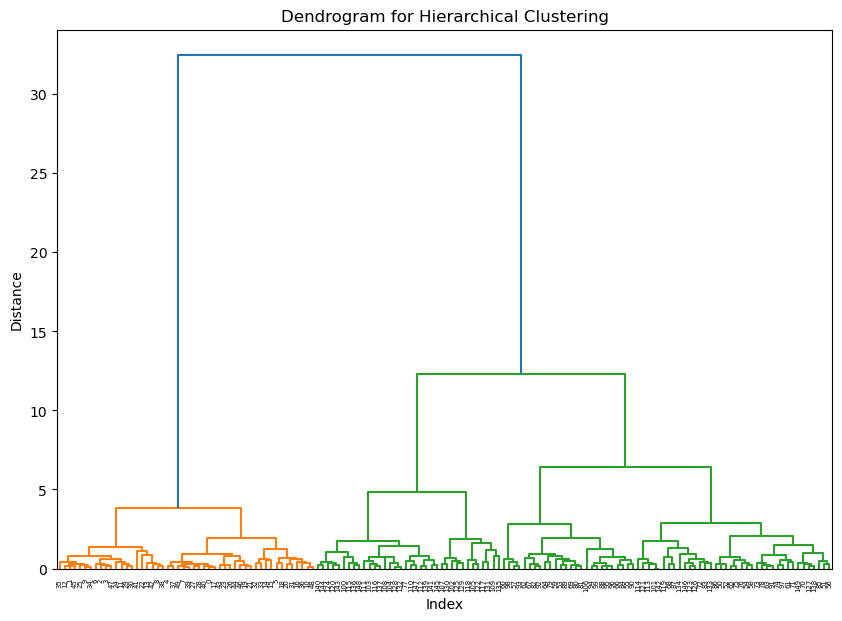

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X)

# Visualizing the clusters (using sepal length and sepal width)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Plotting dendrogram for Hierarchical clustering
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()
